# TP 5 - CIENCIA DE DATOS 

In [151]:
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline  

Punto 1, 2 y 3
Se implementa el modelo bayesiano para las distintas condiciones de parámetros. Se calcula el MAP y la media a partir del posterior para la distribucón de la variable probabilidad. Esta variable es un parámetro de la distribución binomial relacionada a la probabilidad de que salgan un determinado número de caras para un numero fijo de tiradas. Se grafican dichos posteriors.

Assigned NUTS to t_1_logodds__
Assigned Metropolis to y_pred_1
100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:05<00:00, 251.02it/s]
logp = -4.852, ||grad|| = 2.5: 100%|████████████████████████████████████████████████████| 8/8 [00:00<00:00, 421.99it/s]
100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:02<00:00, 524.80it/s]
logp = -4.852, ||grad|| = 2.5: 100%|████████████████████████████████████████████████████| 8/8 [00:00<00:00, 452.31it/s]


{'t_1_logodds__': array(1.7917593382745627), 'y_pred_1': array(0, dtype=int64), 't_1': array(0.857142841107735)}
0.890316866651


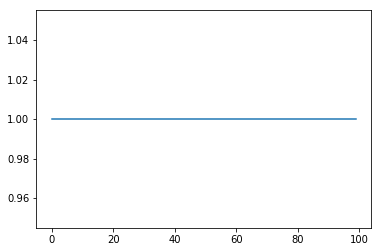

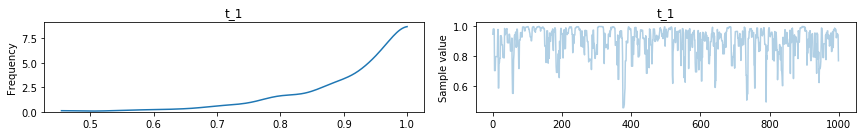

In [152]:
n_tiradas=6
n_caras=6
niter =1000
prior=stats.beta(1,1)
xs = np.linspace(0, 1, 100)
plt.plot(prior.pdf(xs), label='Prior')

model_1 = pm.Model()
with model_1:
    # Priors 
    t_1 = pm.Beta('t_1',alpha=1,beta=1)
    y_1 = pm.Binomial('y_1',n=n_tiradas,p=t_1,observed=n_caras)
    y_pred_1 = pm.Binomial('y_pred_1',n=1,p=t_1)
    trace = pm.sample(niter)
    start = pm.find_MAP()
    #start = {'p_u_logodds__': 13.385080233683778}
    step = pm.Metropolis()
    trace = pm.sample(niter, step=step, start=start, njobs=1, random_seed=123)
    pm.traceplot(trace, varnames=['t_1'])
    MAP_m1=pm.find_MAP()
print(MAP_m1)
p_1 = trace.get_values('t_1', burn=niter//2, combine=True)
print(np.mean(p_1))
plt.show()



In [153]:
#Posterior predictive. Probabilidad de obtener una cara en una tirada dado el posterior hallado por el modelo
a=np.histogram(p_1,100,range=(0,1),density='true' )
np.sum(a[0]*((a[1][0:100]+a[1][1:101])/2))

89.010000000000034

Para calcular la probabilidad posterior predictiva de obtener una cara dada una tirada se construye un histograma normalizado
para la probabilidad del parámetro de probabilidad asociado a la distribución binomial y se lo integra en función de la 
probabilidad multiplicandolo por la probabilidad de obtener una cara dada una tirada que en este caso resulta simplemente 
el valor de probabilidad en cuestión.

In [ ]:
n_tiradas=6
n_caras=6
niter =1000
prior=stats.beta(100,100)
xs = np.linspace(0, 1, 100)
plt.plot(prior.pdf(xs), label='Prior')
model_2 = pm.Model()
with model_2:
    # Priors 
    t_2 = pm.Beta('t_2',alpha=100.,beta=100.)
    y_2 = pm.Binomial('y_2',n=n_tiradas,p=t_2,observed=n_caras)
    trace = pm.sample(niter)
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(niter, step=step, start=start, njobs=1, random_seed=123)
    pm.traceplot(trace, varnames=['t_2'])
    MAP_m2=pm.find_MAP()
print(MAP_m2)
p_2 = trace.get_values('t_2', burn=niter//2, combine=True)
print(np.mean(p_2))
plt.show()

In [ ]:
#Posterior predictive. Probabilidad de obtener una cara en una tirada dado el posterior hallado por el modelo
a=np.histogram(p_2,100,range=(0,1),density='true' )
np.sum(a[0]*((a[1][0:100]+a[1][1:101])/2))

In [ ]:
n_tiradas=20
n_caras=20
niter =1000

model_31 = pm.Model()
with model_31:
    # Priors 
    t_31 = pm.Beta('t_31',alpha=1,beta=1)
    y_31= pm.Binomial('y_31',n=n_tiradas,p=t_31,observed=n_caras)
    trace = pm.sample(niter)
    start = pm.find_MAP()
    #start = {'p_u_logodds__': 13.385080233683778}
    step = pm.Metropolis()
    trace = pm.sample(niter, step=step, start=start, njobs=1, random_seed=123)
    pm.traceplot(trace, varnames=['t_31'])
    MAP_m31=pm.find_MAP()
print(MAP_m31)
p_31 = trace.get_values('t_31', burn=niter//2, combine=True)
print(np.mean(p_31))
plt.show()
#Posterior predictive. Probabilidad de obtener una cara en una tirada dado el posterior hallado por el modelo
a=np.histogram(p_31,100,range=(0,1),density='true' )
np.sum(a[0]*((a[1][0:100]+a[1][1:101])/2))

Punto 4
Se vuelve a calcular lo mismo para los casos de 3 tiradas y 3 caras y 20 tiradas y 20 caras. 
Se observa que los resultados de las distribuciones, MAPS, medias de probabilidades y probabilidades a posteriori, dependen fuertemente 
de los priors utilizados y dependen débilmente de los datos observados. El modelo tiene una fuerte dependencia sobre la informacón 
a priori que se conoce del sistema

In [ ]:
n_tiradas=20
n_caras=20
niter =1000

model_32 = pm.Model()
with model_32:
    # Priors 
    t_32 = pm.Beta('t_32',alpha=100.,beta=100.)
    y_32= pm.Binomial('y_32',n=n_tiradas,p=t_32,observed=n_caras)
    trace = pm.sample(niter)
    start = pm.find_MAP()
    #start = {'p_u_logodds__': 13.385080233683778}
    step = pm.Metropolis()
    trace = pm.sample(niter, step=step, start=start, njobs=1, random_seed=123)
    pm.traceplot(trace, varnames=['t_32'])
    MAP_m32=pm.find_MAP()
print(MAP_m32)
p_32 = trace.get_values('t_32', burn=niter//2, combine=True)
print(np.mean(p_32))
plt.show()
#Posterior predictive. Probabilidad de obtener una cara en una tirada dado el posterior hallado por el modelo
a=np.histogram(p_32,100,range=(0,1),density='true' )
np.sum(a[0]*((a[1][0:100]+a[1][1:101])/2))

In [ ]:
n_tiradas=3
n_caras=3
niter =1000

model_41 = pm.Model()
with model_41:
    # Priors 
    t_41 = pm.Beta('t_41',alpha=1,beta=1)
    y_41= pm.Binomial('y_41',n=n_tiradas,p=t_41,observed=n_caras)
    trace = pm.sample(niter)
    start = pm.find_MAP()
    #start = {'p_u_logodds__': 13.385080233683778}
    step = pm.Metropolis()
    trace = pm.sample(niter, step=step, start=start, njobs=1, random_seed=123)
    pm.traceplot(trace, varnames=['t_41'])
    MAP_m41=pm.find_MAP()
print(MAP_m41)
p_41 = trace.get_values('t_41', burn=niter//2, combine=True)
print(np.mean(p_41))
plt.show()
#Posterior predictive. Probabilidad de obtener una cara en una tirada dado el posterior hallado por el modelo
a=np.histogram(p_41,100,range=(0,1),density='true' )
np.sum(a[0]*((a[1][0:100]+a[1][1:101])/2))

In [ ]:
n_tiradas=3
n_caras=3
niter =1000

model_42 = pm.Model()
with model_42:
    # Priors 
    t_42 = pm.Beta('t_42',alpha=100.,beta=100.)
    y_42= pm.Binomial('y_42',n=n_tiradas,p=t_42,observed=n_caras)
    trace = pm.sample(niter)
    start = pm.find_MAP()
    #start = {'p_u_logodds__': 13.385080233683778}
    step = pm.Metropolis()
    trace = pm.sample(niter, step=step, start=start, njobs=1, random_seed=123)
    pm.traceplot(trace, varnames=['t_42'])
    MAP_m42=pm.find_MAP()
print(MAP_m42)
p_42 = trace.get_values('t_42', burn=niter//2, combine=True)
print(np.mean(p_42))
plt.show()
#Posterior predictive. Probabilidad de obtener una cara en una tirada dado el posterior hallado por el modelo
a=np.histogram(p_42,100,range=(0,1),density='true' )
np.sum(a[0]*((a[1][0:100]+a[1][1:101])/2))

Punto 5

Se utiliza el sigueinte esquema para determinar el prior adecuado para el modelo.
Nos basamos en que el hecho de observar 7 caras en 7 tiradas es un evento que nos da un indicio fuerte de que la moneda está cargada.
Evaluamos con el modelo bayesiano la probabilidad de que se observen 7 caras en 7 tiradas. Para eso no tomamos datos observados pero sí 
diferentes priors. Dado que la única información que tiene el modelo es este prior, vamos a variar el mismo y evaluar la probabilidad a posteriori
de hallar 7 caras de 7 tiradas. Si la probabilidad es menor a 0.01(probabilidad umbral arbitraria) concluiremos que el prior 
utilizado es apropiado en relación a nuestra suposición inicial.
El prior indicado que hallamos que cumple esto, resulta el asociado a un alpha=70

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:03<00:00, 413.61it/s]
logp = 0, ||grad|| = 0: 100%|███████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 188.09it/s]
100%|████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:00<00:00, 1598.28it/s]
logp = 0, ||grad|| = 0: 100%|███████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 498.28it/s]


16.9666262479


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:03<00:00, 441.44it/s]
logp = 0.90054, ||grad|| = 0: 100%|█████████████████████████████████████████████████████| 2/2 [00:00<00:00, 259.04it/s]
100%|████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:00<00:00, 1504.21it/s]
logp = 0.90054, ||grad|| = 0: 100%|█████████████████████████████████████████████████████| 2/2 [00:00<00:00, 438.85it/s]


3.33197091924


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:03<00:00, 430.11it/s]
logp = 1.2596, ||grad|| = 0: 100%|██████████████████████████████████████████████████████| 2/2 [00:00<00:00, 127.18it/s]
100%|████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:01<00:00, 1394.72it/s]
logp = 1.2596, ||grad|| = 0: 100%|██████████████████████████████████████████████████████| 2/2 [00:00<00:00, 287.70it/s]


2.06685577937


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:03<00:00, 446.63it/s]
logp = 1.4665, ||grad|| = 0: 100%|██████████████████████████████████████████████████████| 2/2 [00:00<00:00, 498.55it/s]
100%|████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:01<00:00, 1499.44it/s]
logp = 1.4665, ||grad|| = 0: 100%|██████████████████████████████████████████████████████| 2/2 [00:00<00:00, 278.94it/s]


1.51453629315


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:03<00:00, 459.15it/s]
logp = 1.6124, ||grad|| = 0: 100%|██████████████████████████████████████████████████████| 2/2 [00:00<00:00, 127.69it/s]
100%|████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:01<00:00, 1198.37it/s]
logp = 1.6124, ||grad|| = 0: 100%|██████████████████████████████████████████████████████| 2/2 [00:00<00:00, 502.34it/s]


1.29708643873


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:03<00:00, 464.54it/s]
logp = 1.8172, ||grad|| = 0: 100%|██████████████████████████████████████████████████████| 2/2 [00:00<00:00, 498.97it/s]
100%|████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:00<00:00, 1507.13it/s]
logp = 1.8172, ||grad|| = 0: 100%|██████████████████████████████████████████████████████| 2/2 [00:00<00:00, 398.49it/s]


1.16310552351


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:03<00:00, 448.73it/s]
logp = 1.9621, ||grad|| = 0: 100%|██████████████████████████████████████████████████████| 2/2 [00:00<00:00, 332.30it/s]
100%|████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:01<00:00, 1473.19it/s]
logp = 1.9621, ||grad|| = 0: 100%|██████████████████████████████████████████████████████| 2/2 [00:00<00:00, 520.97it/s]


1.11587491074


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 97%|██████████████████████████████████████████████████████████████████████████▉  | 1461/1500 [00:03<00:00, 438.86it/s]C:\Users\martin\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\step_methods\hmc\nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.880501015001, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:03<00:00, 439.69it/s]
logp = 2.0743, ||grad|| = 0: 100%|██████████████████████████████████████████████████████| 2/2 [00:00<00:00, 114.17it/s]
100%|████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:01<00:00, 1429.16it/s]
logp = 2.0743, ||grad|| = 0: 100%|██████████████████████████████████████████████████████| 2/2 [00:00<00:00, 214.73it/s]

1.11065355343


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:03<00:00, 431.63it/s]
logp = 2.1659, ||grad|| = 0: 100%|██████████████████████████████████████████████████████| 2/2 [00:00<00:00, 372.35it/s]
100%|████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:01<00:00, 1485.54it/s]
logp = 2.1659, ||grad|| = 0: 100%|██████████████████████████████████████████████████████| 2/2 [00:00<00:00, 140.31it/s]


1.01630345742


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:03<00:00, 432.45it/s]
logp = 2.2432, ||grad|| = 0: 100%|██████████████████████████████████████████████████████| 2/2 [00:00<00:00, 110.98it/s]
100%|████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:01<00:00, 1495.60it/s]
logp = 2.2432, ||grad|| = 0: 100%|██████████████████████████████████████████████████████| 2/2 [00:00<00:00, 117.83it/s]


0.93982461272


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:03<00:00, 419.83it/s]
logp = 2.3102, ||grad|| = 0: 100%|██████████████████████████████████████████████████████| 2/2 [00:00<00:00, 102.41it/s]
100%|████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:01<00:00, 1458.30it/s]
logp = 2.3102, ||grad|| = 0: 100%|██████████████████████████████████████████████████████| 2/2 [00:00<00:00, 110.97it/s]


0.9780711662


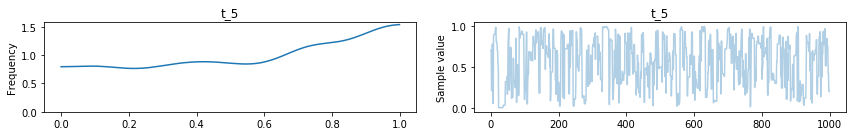

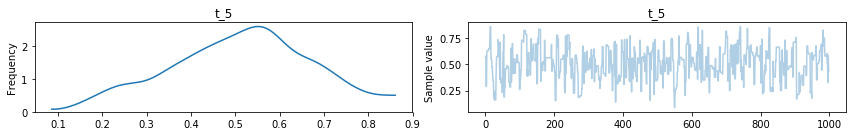

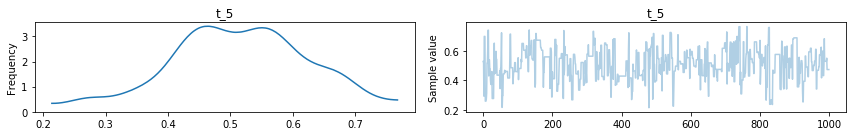

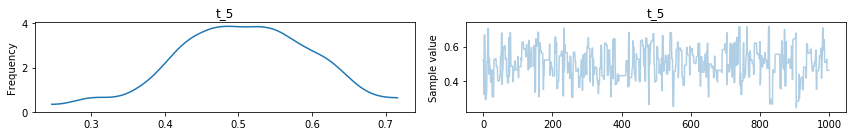

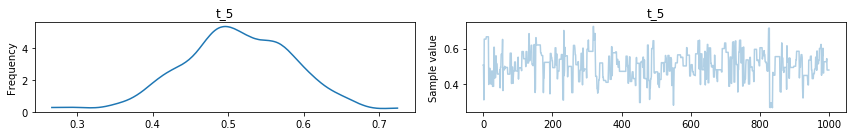

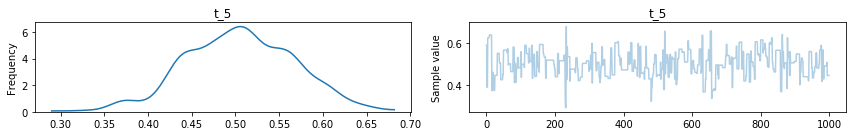

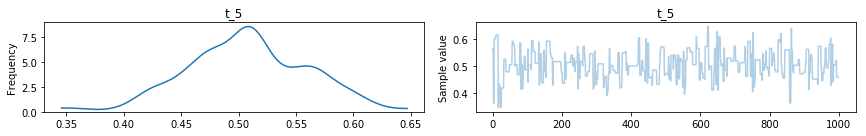

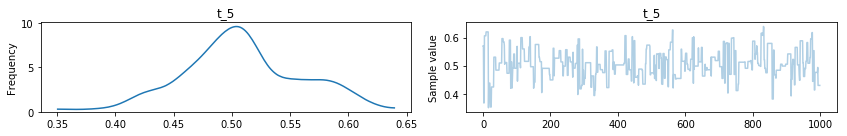

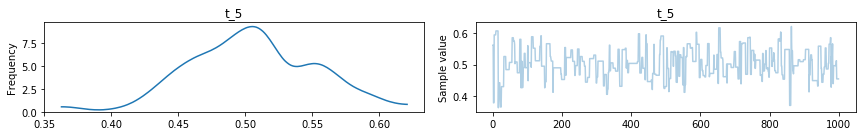

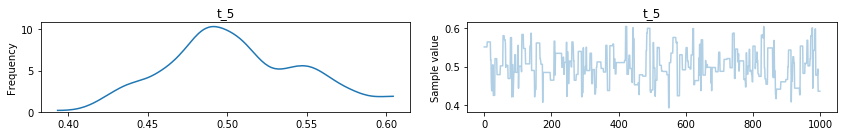

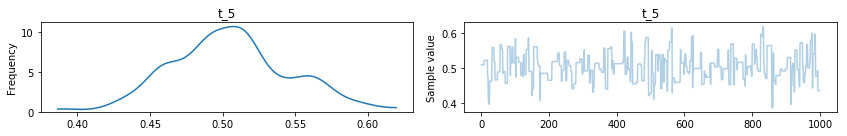

In [150]:
n_tiradas=0
n_caras=0
niter =1000
ind=0
prob=np.array(11)
alphas=np.array([1, 5, 10, 15, 20, 30, 40, 50,60,70,80])
for alpha in alphas:
    ind=ind+1
    model_5 = pm.Model()
    with model_5:
        # Priors 
        t_5 = pm.Beta('t_5',alpha=alpha,beta=alpha)
        y_5= pm.Binomial('y_5',n=n_tiradas,p=t_5,observed=n_caras)
        trace = pm.sample(niter)
        start = pm.find_MAP()
        #start = {'p_u_logodds__': 13.385080233683778}
        step = pm.Metropolis()
        trace = pm.sample(niter, step=step, start=start, njobs=1, random_seed=123)
        pm.traceplot(trace, varnames=['t_5'])
        MAP_m5=pm.find_MAP()
    #print(MAP_m5)
    p_5 = trace.get_values('t_5', burn=niter//2, combine=True)
    #print(np.mean(p_5))
    #plt.show()
    #Posterior predictive. Probabilidad de obtener una cara en una tirada dado el posterior hallado por el modelo
    a=np.histogram(p_5,100,range=(0,1),density='true' )
    b=stats.binom.pmf(7, 7,(a[1][0:100]+a[1][1:101])/2)
    print(np.sum(a[0]*b))#Probabilidad de obtener 7 caras dadas 7 tiradas

Para calcular la probabilidad posterior predictiva de obtener siete caras dadas 7 tiradas se construye un histograma normalizado
para la probabilidad del parámetro de probabilidad asociado a la distribución binomial y se lo integra en función de la 
probabilidad multiplicandolo por la probabilidad de obtener 7 caras dadas 7 tiradas que en este caso resulta la distribución binomial con sus correspondientes paràmetros(k=7, n=7 y p la variable a integrar).